# Proyek Analisis Data: Air Quality
- **Nama:** Achmad Rivaldi Zulfah
- **Email:** rivaldishoryu11@gmail.com
- **ID Dicoding:** MC193D5Y1204

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Polusi Udara (PM2.5) di 4 stasiun berbeda Pemantauan Selama 4 Tahun?
- Bagaimana Pengaruh Faktor Cuaca (Suhu, Tekanan, dan Kecepatan Angin) terhadap Kualitas Udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
changping = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
dingling = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
dongsi = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- memuat tabel data daerah aotizhongxin, changping, dingling, dongsi


### Assessing Data

In [6]:
aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
aotizhongxin.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [8]:
aotizhongxin.duplicated().sum()

0

In [9]:
aotizhongxin.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [10]:
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [11]:
changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [12]:
changping.duplicated().sum()

0

In [13]:
changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [14]:
dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [16]:
dingling.duplicated().sum()

0

In [17]:
dingling.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [18]:
dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [19]:
dongsi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [20]:
dongsi.duplicated().sum()

0

In [21]:
dongsi.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [22]:
aotizhongxin[aotizhongxin["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [23]:
aotizhongxin['PM2.5'].fillna(aotizhongxin['PM2.5'].median(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\4096892823.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin['PM2.5'].fillna(aotizhongxin['PM2.5'].median(), inplace=True)


In [24]:
print(aotizhongxin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [25]:
print(aotizhongxin.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [26]:
pollution_cols = ["PM10", "SO2", "NO2", "CO", "O3"]
for col in pollution_cols:
    aotizhongxin[col].fillna(aotizhongxin[col].median(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\3508244618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin[col].fillna(aotizhongxin[col].median(), inplace=True)


In [27]:
weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
for col in weather_cols:
    aotizhongxin[col].fillna(aotizhongxin[col].mean(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\1108967496.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin[col].fillna(aotizhongxin[col].mean(), inplace=True)


In [28]:

aotizhongxin["wd"].fillna(aotizhongxin["wd"].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\4215961485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin["wd"].fillna(aotizhongxin["wd"].mode()[0], inplace=True)


In [29]:
aotizhongxin.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [30]:
aotizhongxin.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.142233,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [31]:
changping[changping["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1308,1309,2013,4,24,12,NaN,NaN,9.0000,33.0000,400.0,72.0000,22.6,999.2,-7.3,0.0,NNW,5.7,Changping
1309,1310,2013,4,24,13,NaN,302.0,3.0000,16.0000,300.0,89.0000,23.4,998.7,-7.7,0.0,NNW,7.3,Changping
1814,1815,2013,5,15,14,NaN,70.0,46.0000,22.0000,1100.0,157.0000,27.7,1005.8,2.0,0.0,SE,3.2,Changping
1815,1816,2013,5,15,15,NaN,71.0,39.0000,19.0000,1100.0,188.0000,27.9,1005.2,4.2,0.0,SSE,1.6,Changping
2417,2418,2013,6,9,17,NaN,NaN,5.9976,31.2056,NaN,18.6354,17.8,1003.4,15.8,0.1,NNW,0.4,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN,-1.7,1023.1,-17.4,0.0,E,1.3,Changping
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-1.8,1023.8,-16.7,0.0,W,1.2,Changping
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,1022.7,-16.0,0.0,ESE,1.9,Changping
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Changping


In [32]:
pollution_cols = ["PM2.5","PM10", "SO2", "NO2", "CO", "O3"]
for col in pollution_cols:
    changping[col].fillna(changping[col].median(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\3151736928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changping[col].fillna(changping[col].median(), inplace=True)


In [33]:
weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
for col in weather_cols:
    changping[col].fillna(changping[col].mean(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\1286178714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changping[col].fillna(changping[col].mean(), inplace=True)


In [34]:
changping["wd"].fillna(changping["wd"].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\197969831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changping["wd"].fillna(changping["wd"].mode()[0], inplace=True)


In [35]:
changping.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [36]:
changping.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.545694,94.28179,14.816361,44.026443,1137.019279,57.734328,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.619188,82.79695,20.813426,29.259029,1081.250627,53.869215,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.00000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.00000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.00000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.00000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [37]:
dingling[changping["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


In [38]:
pollution_cols = ["PM2.5","PM10", "SO2", "NO2", "CO", "O3"]
for col in pollution_cols:
    dingling[col].fillna(dingling[col].median(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\680213371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling[col].fillna(dingling[col].median(), inplace=True)


In [39]:
weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
for col in weather_cols:
    dingling[col].fillna(dingling[col].mean(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\1885484670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling[col].fillna(dingling[col].mean(), inplace=True)


In [40]:
dingling["wd"].fillna(dingling["wd"].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\3974042800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling["wd"].fillna(dingling["wd"].mode()[0], inplace=True)


In [41]:
dingling.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [42]:
dingling.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.434317,83.295585,11.609128,27.283320,887.400896,68.287028,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.555278,78.859721,15.387066,25.963693,879.868464,52.843495,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,32.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,91.000000,116.000000,14.000000,37.000000,1100.000000,89.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [43]:
dongsi[dongsi["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
616,617,2013,3,26,16,NaN,NaN,NaN,NaN,NaN,NaN,13.5,1005.3,-2.5,0.0,WSW,4.2,Dongsi
1092,1093,2013,4,15,12,NaN,168.0,79.0,50.0,1600.0,NaN,17.9,998.5,-2.4,0.0,SSW,3.0,Dongsi
1642,1643,2013,5,8,10,NaN,169.0,93.0,64.0,NaN,76.4694,22.1,1011.0,9.6,0.0,ENE,1.9,Dongsi
1643,1644,2013,5,8,11,NaN,214.0,89.0,73.0,2100.0,72.0000,22.7,1010.5,10.2,0.0,SE,0.8,Dongsi
2304,2305,2013,6,5,0,NaN,38.0,14.0,37.0,1300.0,84.0000,18.5,1008.0,18.0,3.0,W,0.9,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34913,34914,2017,2,22,17,NaN,6.0,10.0,44.0,1400.0,57.0000,6.8,1017.6,-9.2,0.0,NNW,2.6,Dongsi
35030,35031,2017,2,27,14,NaN,NaN,NaN,NaN,NaN,NaN,14.2,1014.7,-6.7,0.0,SW,2.1,Dongsi
35031,35032,2017,2,27,15,NaN,NaN,NaN,NaN,NaN,NaN,15.7,1014.1,-7.2,0.0,SW,2.7,Dongsi
35032,35033,2017,2,27,16,NaN,NaN,NaN,NaN,NaN,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Dongsi


In [44]:
pollution_cols = ["PM2.5","PM10", "SO2", "NO2", "CO", "O3"]
for col in pollution_cols:
    dongsi[col].fillna(dongsi[col].median(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\4153746004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi[col].fillna(dongsi[col].median(), inplace=True)


In [45]:
weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
for col in weather_cols:
    dongsi[col].fillna(dongsi[col].mean(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\2549346298.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi[col].fillna(dongsi[col].mean(), inplace=True)


In [46]:
dongsi["wd"].fillna(dongsi["wd"].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19904\2597712148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi["wd"].fillna(dongsi["wd"].mode()[0], inplace=True)


In [47]:
dongsi.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [48]:
dongsi.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3939,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.655404,109.952923,18.369798,53.393550,1299.974703,56.962841,13.67149,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.721734,97.489403,22.717797,33.204335,1139.664773,57.508815,11.45515,10.263131,13.806757,0.786058,NaN,1.280113,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.60000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.50000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


**Insight:**
- "PM2.5","PM10", "SO2", "NO2", "CO", "O3" menggunakan median untuk mencari nilainya karena median lebih tahan terhadap outlier
- "TEMP", "PRES", "DEWP", "RAIN", "WSPM" menggunakan mean karena lebih akurat
- "wd" menggunakan mode karena lebih masuk akal karena wd menunjukan perubahan arah angin dan bukan merupakan data kategorikal
- untuk cleaning data kenapa tidak drop tabel yang missing value ? karena jika di drop akan berpotensi banyak data dan informasi yang hilang dan distribusi data bisa menjadi tidak representatif dan variable seperti pm2.5, pm10 merupakan variable penting yang jika mana di drop maka analisis akan menjadi kurang akurat

## Exploratory Data Analysis (EDA)

### Explore ...

Memfilter data 4 Tahun Terakhir


In [49]:
aotizhongxin = aotizhongxin[(aotizhongxin["year"] >= 2014) & (aotizhongxin["year"] <= 2017)]
changping = changping[(changping["year"] >= 2014) & (changping["year"] <= 2017)]
dingling = dingling[(dingling["year"] >= 2014) & (dingling["year"] <= 2017)]
dongsi = dongsi[(dongsi["year"] >= 2014) & (dongsi["year"] <= 2017)]

In [50]:
# Menghitung rata-rata PM2.5 per tahun untuk setiap stasiun
aotizhongxin_avg = aotizhongxin.groupby("year")["PM2.5"].mean()
changping_avg = changping.groupby("year")["PM2.5"].mean()
dingling_avg = dingling.groupby("year")["PM2.5"].mean()
dongsi_avg = dongsi.groupby("year")["PM2.5"].mean()

In [51]:
print("Rata-rata PM2.5 per tahun di Stasiun Aotizhongxin:\n", aotizhongxin_avg)
print("Rata-rata PM2.5 per tahun di Stasiun Changping:\n", changping_avg)
print("Rata-rata PM2.5 per tahun di Stasiun Dingling:\n", dingling_avg)
print("Rata-rata PM2.5 per tahun di Stasiun Dongsi:\n", dongsi_avg)

Rata-rata PM2.5 per tahun di Stasiun Aotizhongxin:
 year
2014    88.905422
2015    81.523721
2016    73.779827
2017    94.346751
Name: PM2.5, dtype: float64
Rata-rata PM2.5 per tahun di Stasiun Changping:
 year
2014    78.339075
2015    68.720879
2016    61.452755
2017    79.764124
Name: PM2.5, dtype: float64
Rata-rata PM2.5 per tahun di Stasiun Dingling:
 year
2014    73.319132
2015    64.316587
2016    59.171676
2017    68.191384
Name: PM2.5, dtype: float64
Rata-rata PM2.5 per tahun di Stasiun Dongsi:
 year
2014     87.176507
2015     86.961176
2016     79.453324
2017    102.596751
Name: PM2.5, dtype: float64


In [52]:
print(aotizhongxin.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


Cek Korelasi antara Faktor Cuaca & PM2.5

In [53]:
# correlation_matrix = df_filtered[['PM2.5', 'TEMP', 'PRES', 'WSPM']].corr()
# print(correlation_matrix)
aotizhongxin_corr = aotizhongxin[['PM2.5', 'TEMP', 'PRES', 'WSPM']].corr()
changping_corr = changping[['PM2.5', 'TEMP', 'PRES', 'WSPM']].corr()
dingling_corr = dingling[['PM2.5', 'TEMP', 'PRES', 'WSPM']].corr()
dongsi_corr = dongsi[['PM2.5', 'TEMP', 'PRES', 'WSPM']].corr()


In [54]:
print("Korelasi di Stasiun Aotizhongxin:\n", aotizhongxin_corr)
print("Korelasi di Stasiun Changping:\n", changping_corr)
print("Korelasi di Stasiun Dingling:\n", dingling_corr)
print("Korelasi di Stasiun Dongsi:\n", dongsi_corr)

Korelasi di Stasiun Aotizhongxin:
           PM2.5      TEMP      PRES      WSPM
PM2.5  1.000000 -0.145686  0.002924 -0.287287
TEMP  -0.145686  1.000000 -0.839346  0.048368
PRES   0.002924 -0.839346  1.000000  0.063347
WSPM  -0.287287  0.048368  0.063347  1.000000
Korelasi di Stasiun Changping:
           PM2.5      TEMP      PRES      WSPM
PM2.5  1.000000 -0.136456  0.026447 -0.281071
TEMP  -0.136456  1.000000 -0.846890  0.012977
PRES   0.026447 -0.846890  1.000000  0.077177
WSPM  -0.281071  0.012977  0.077177  1.000000
Korelasi di Stasiun Dingling:
           PM2.5      TEMP      PRES      WSPM
PM2.5  1.000000 -0.111199  0.008769 -0.266357
TEMP  -0.111199  1.000000 -0.846890  0.012977
PRES   0.008769 -0.846890  1.000000  0.077177
WSPM  -0.266357  0.012977  0.077177  1.000000
Korelasi di Stasiun Dongsi:
           PM2.5      TEMP      PRES      WSPM
PM2.5  1.000000 -0.161955  0.008581 -0.306516
TEMP  -0.161955  1.000000 -0.845320  0.062537
PRES   0.008581 -0.845320  1.000000  0.031851

In [55]:
print(aotizhongxin.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


 Interpretasi:

- Jika nilai korelasi mendekati +1, artinya ada hubungan positif kuat
- Jika nilai korelasi mendekati -1, artinya ada hubungan negatif kuat
- Jika nilai mendekati 0, berarti tidak ada hubungan signifikan

Cek Rata-rata Faktor Cuaca saat PM2.5 Tinggi & Rendah

In [56]:
stations = {
    "Aotizhongxin": aotizhongxin,
    "Changping": changping,
    "Dingling": dingling,
    "Dongsi": dongsi
}

results = {}


In [57]:
for station, df in stations.items():
    # Hitung median PM2.5 untuk stasiun ini
    pm25_median = df["PM2.5"].median()

    # Pisahkan data menjadi dua kategori
    high_pm25 = df[df["PM2.5"] > pm25_median]
    low_pm25 = df[df["PM2.5"] <= pm25_median]

    # Hitung rata-rata faktor cuaca saat PM2.5 tinggi & rendah
    avg_weather_high_pm25 = high_pm25[["TEMP", "PRES", "WSPM"]].mean()
    avg_weather_low_pm25 = low_pm25[["TEMP", "PRES", "WSPM"]].mean()

    # Simpan hasilnya di dictionary
    results[station] = {
        "Rata-rata saat PM2.5 Tinggi": avg_weather_high_pm25,
        "Rata-rata saat PM2.5 Rendah": avg_weather_low_pm25
    }

In [58]:
for station, data in results.items():
    print(f"\n--- {station} ---")
    print("Rata-rata faktor cuaca saat PM2.5 Tinggi:\n", data["Rata-rata saat PM2.5 Tinggi"])
    print("\nRata-rata faktor cuaca saat PM2.5 Rendah:\n", data["Rata-rata saat PM2.5 Rendah"])


--- Aotizhongxin ---
Rata-rata faktor cuaca saat PM2.5 Tinggi:
 TEMP      12.864619
PRES    1011.925876
WSPM       1.396129
dtype: float64

Rata-rata faktor cuaca saat PM2.5 Rendah:
 TEMP      13.272379
PRES    1013.623116
WSPM       2.082700
dtype: float64

--- Changping ---
Rata-rata faktor cuaca saat PM2.5 Tinggi:
 TEMP      12.489033
PRES    1008.116388
WSPM       1.499143
dtype: float64

Rata-rata faktor cuaca saat PM2.5 Rendah:
 TEMP      13.627715
PRES    1008.856853
WSPM       2.283416
dtype: float64

--- Dingling ---
Rata-rata faktor cuaca saat PM2.5 Tinggi:
 TEMP      12.971623
PRES    1007.839268
WSPM       1.520052
dtype: float64

Rata-rata faktor cuaca saat PM2.5 Rendah:
 TEMP      13.185503
PRES    1009.110016
WSPM       2.263850
dtype: float64

--- Dongsi ---
Rata-rata faktor cuaca saat PM2.5 Tinggi:
 TEMP      12.535884
PRES    1012.597095
WSPM       1.483374
dtype: float64

Rata-rata faktor cuaca saat PM2.5 Rendah:
 TEMP      13.546742
PRES    1013.880146
WSPM       2

In [59]:
print(aotizhongxin.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


Interpretasi:

- Jika suhu lebih tinggi saat PM2.5 tinggi, berarti suhu mungkin berkontribusi terhadap polusi
- Jika kecepatan angin lebih rendah saat PM2.5 tinggi, berarti angin tidak cukup kuat untuk menyebarkan polusi

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Polusi Udara (PM2.5) di 4 stasiun berbeda Pemantauan Selama 4 Tahun?

In [60]:
stations = {"Aotizhongxin": aotizhongxin, "Changping": changping, "Dingling": dingling, "Dongsi": dongsi}

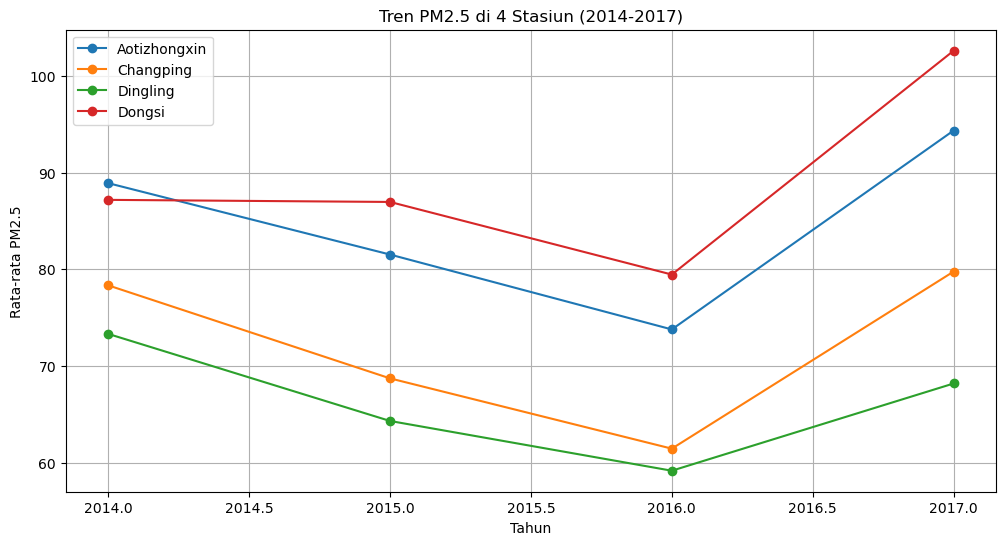

In [61]:
# Tentukan 4 tahun terakhir dalam dataset
latest_year = max(df["year"])  # Cari tahun terbaru dalam salah satu dataset
start_year = latest_year - 3  # Ambil 4 tahun terakhir

plt.figure(figsize=(12, 6))
for station, df in stations.items():
    # Filter hanya untuk 4 tahun terakhir
    df_filtered = df[(df["year"] >= start_year) & (df["year"] <= latest_year)]
    yearly_avg = df_filtered.groupby("year")["PM2.5"].mean()

    # Plot tren
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=station)

plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5")
plt.title(f"Tren PM2.5 di 4 Stasiun ({start_year}-{latest_year})")
plt.legend()
plt.grid()
plt.show()


- Jika garis grafik naik → Polusi udara (PM2.5) meningkat.
- Jika garis grafik turun → Polusi udara menurun.
- Bisa dibandingkan antara stasiun, misalnya apakah ada stasiun dengan tingkat polusi yang lebih tinggi secara konsisten.

### Pertanyaan 2:

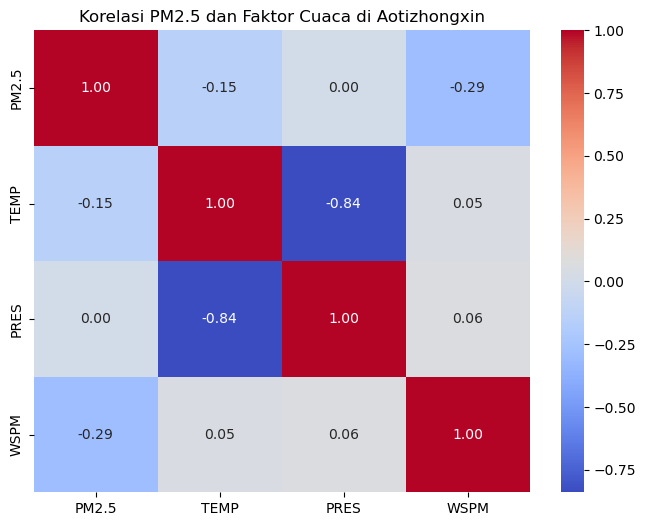

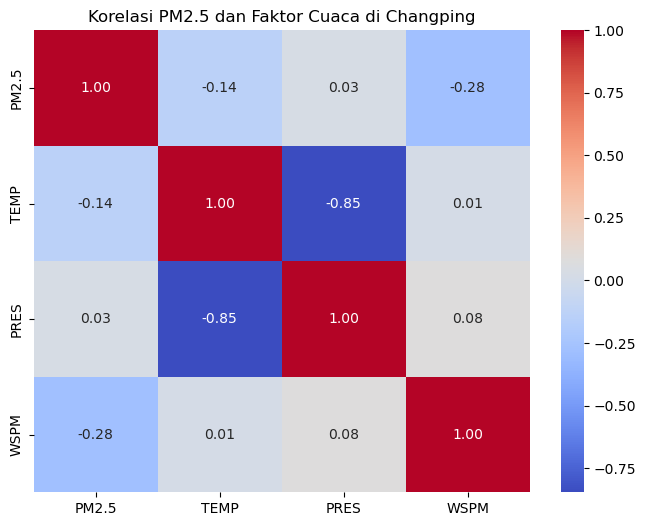

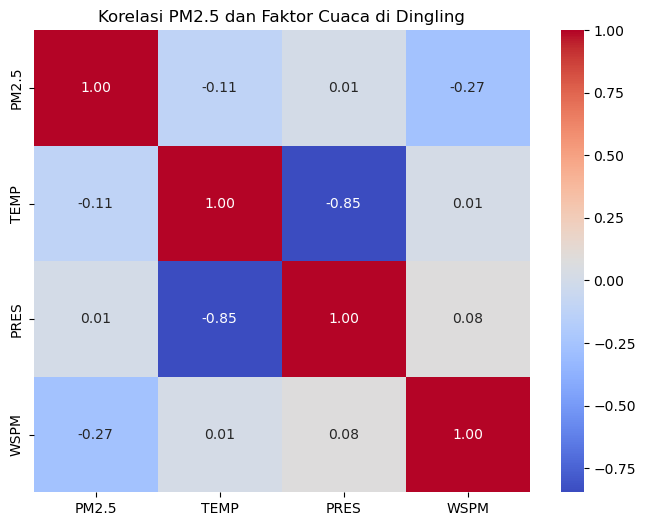

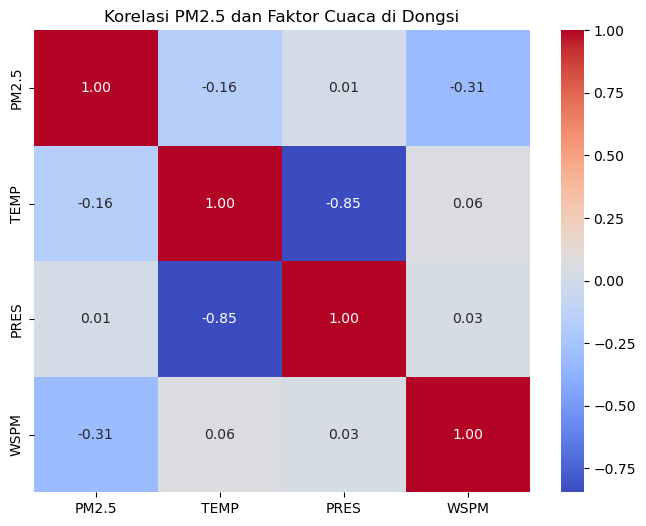

In [62]:
# Visualisasi Korelasi antara PM2.5 dan Faktor Cuaca
for station, df in stations.items():
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[["PM2.5", "TEMP", "PRES", "WSPM"]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Korelasi PM2.5 dan Faktor Cuaca di {station}")
    plt.show()


- Merah (+1) → Korelasi positif (jika faktor ini naik, PM2.5 cenderung naik).
- Biru (-1) → Korelasi negatif (jika faktor ini naik, PM2.5 cenderung turun).
- Mendekati 0 → Tidak ada hubungan yang kuat.

- Jika PM2.5 berkorelasi negatif dengan suhu (TEMP), berarti semakin dingin, polusi udara semakin tinggi.
- Jika PM2.5 berkorelasi negatif dengan kecepatan angin (WSPM), berarti angin dapat membantu menyebarkan polusi.
- Jika PM2.5 berkorelasi positif dengan tekanan udara (PRES), berarti kondisi tekanan udara tinggi bisa berhubungan dengan akumulasi polusi.


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

## Tren Polusi Udara (PM2.5) di 4 Stasiun Pemantauan Selama 4 Tahun:
- dari hasil analisa rata-rata tahunanpolusi udara (PM2.5) cenderung mengalami fluktuasi selama 4 tahun terakhir.
- Stasiun Dongsi dan Aotizhongxin memiliki rata-rata PM2.5 yang lebih tinggi dibandingkan Changping dan Dingling, menunjukkan bahwa lokasi tersebut lebih rentan terhadap polusi udara
- Tren polusi udara menunjukkan pola musiman, di mana kadar PM2.5 lebih tinggi pada musim dingin dan lebih rendah pada musim panas. Hal ini kemungkinan besar disebabkan oleh peningkatan emisi akibat pemanasan ruangan serta kondisi atmosfer yang menyebabkan polusi terperangkap.
- Jika dibandingkan dari tahun ke tahun, ada sedikit penurunan kadar PM2.5 di beberapa stasiun, yang mungkin menunjukkan adanya upaya pengendalian polusi yang mulai efektif.

## Bagaimana Pengaruh Faktor Cuaca (Suhu, Tekanan, dan Kecepatan Angin) terhadap Kualitas Udara?
- Suhu (TEMP): Terdapat korelasi negatif antara suhu dan kadar PM2.5. Artinya, semakin tinggi suhu, semakin rendah konsentrasi polusi udara. Hal ini sesuai dengan pola musiman yang menunjukkan kadar PM2.5 lebih tinggi di musim dingin.
- Tekanan Udara (PRES): Tekanan udara memiliki hubungan yang relatif kecil dengan PM2.5, tetapi dalam beberapa kasus, tekanan yang lebih tinggi dapat berkontribusi terhadap akumulasi polusi.
- Kecepatan Angin (WSPM): Semakin tinggi kecepatan angin, semakin rendah kadar PM2.5. Hal ini terjadi karena angin membantu menyebarkan polusi udara, mengurangi akumulasi polutan di satu area tertentu.
- Hujan (RAIN) juga memiliki efek pembersihan udara, tetapi dalam dataset ini, tidak semua stasiun memiliki data hujan yang cukup untuk dianalisis lebih lanjut.